# Problem Statement :<br> 
Predict whether a person will default on loan or not, based on the given attributes.
## Meta Data-
The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral. The data set has the following characteristics:

■ BAD: 1 = applicant defaulted on loan or seriously delinquent; 0= applicant paid loan (Target Variable){Assymetric Binnary Nominal}

■ LOAN: Amount of the loan request{Ratio-Scaled Numeric}

■ MORTDUE: Amount due on existing mortgage{Ratio-Scaled Numeric}

■ VALUE: Value of current property{Ratio-Scaled Numeric}

■ REASON: DebtCon = debt consolidation; Homelmp home improvement{Nominal}

■ JOB: Occupational categories{Nominal}

■ YOJ: Years at present job

■ DEROG: Number of major derogatory reports

■ DELINQ: Number of delinquent credit lines

■ CLAGE: Age of oldest credit line in months

■ NINQ: Number of recent credit inquiries

■ CLNO: Number of credit lines

■ DEBTINC: Debt-to-income ratio{Ratio-Scaled Numeric}

Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
# !pip install ppscore
# import ppscore as pps
import statsmodels.api as sm
from scipy.stats import probplot
from sklearn import metrics               
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_absolute_error
%matplotlib inline
!pip install PyCustom
import PyCustom
from statistics import mean, stdev
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, cross_validate, StratifiedKFold
from sklearn.svm import SVC 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Taking csv data as input

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/akhil14shukla/IME672A-Course-Project/master/hmeq.csv")

<IPython.core.display.Javascript object>

## Understanding the Data

 
**Initial understanding of data i.e types of variables present, missing values and their distribution**

In [ ]:
(df.head())

<IPython.core.display.Javascript object>

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
print(df.shape)
(df.info())

<IPython.core.display.Javascript object>

(5960, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
(df.describe())

<IPython.core.display.Javascript object>

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


Improving visuals of plots

In [ ]:
sns.set(style="whitegrid")
# plt.style.use('white')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
colormap = sns.diverging_palette(220, 10, as_cmap=True)

<IPython.core.display.Javascript object>

## Explaining the data<br>
Features of the Data:

<IPython.core.display.Javascript object>

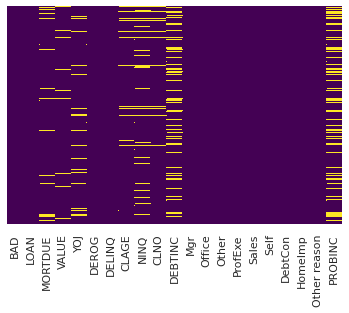

In [ ]:
# Heatmap for null/missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Most of the data is already numerical, only two are of strings type (_REASON_ and _JOB_).

In [ ]:
print(df["REASON"].value_counts())
print(df["JOB"].value_counts())

<IPython.core.display.Javascript object>

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


**We need to fill these two variable's null values and One-Hot-Encode or Label Encode them to plot their distribution efficiently.<br><br>**
Reason/Meaning of null values in REASON and JOB, and how we will fill these:<br><br>

We can replace the missing value with 
* a new value _"Unknown"_ 
* values based on the distribution of non-missing values
* the most frequent value  
* the predicted value using other attributes and Decision Tree.
<br><br>
[//]: # (Hello)
REASON - This shows the reason why the person is taking the loan. There are two available values : Debt consolidation and Home Improvement. The missing value must be showing that the Reason of taking the loan was not either of the two given optins and hence was left empty. So, **filling the missing values with a new value _"Other reason"_, for this attribute**.<br><br>


JOB - This tells the occupation of the applicant. There are 6 unique values for this attribute, and the value _"Other"_ is the most frequent. The _"Other"_ value is already present, so it rules out the reasoning used above. Out of the remaining options, we can **replace the missing values with the most frequent value for simplicity**<br><br>

DEROG - Around 4700 have value _0_. So, **replacing the missing values with the mode** (i.e. 0) 
<br><br>
DELINQ - Around 5200 have same value (_0_). **Replacing the missing with the mode value**. 

In [ ]:
# We can fill the missing values with the mode, i.e. "Other", or we can fill the missing values depending on the distribution of the non-null values. 
df["REASON"].fillna("Other reason",inplace=True)
df["JOB"].fillna(df["JOB"].mode()[0],inplace=True)
df["DEROG"].fillna(value=0,inplace=True)        # Filling the missing value with the mode
df["DELINQ"].fillna(value=0,inplace=True)       # Filling the missing value with the mode
# print(df["JOB"].isna().sum())

<IPython.core.display.Javascript object>

_REASON_ and _JOB_ are categorical attributes and of string type. Some plots work only with numerical values, so we need to convert them to numericals. Using Label Encoding on these two variables to convert them to numerical values. (We can also use One-Hot-Encoding)

In [ ]:
# label_encoder = preprocessing.LabelEncoder()
# df['JOB']= label_encoder.fit_transform(df['JOB'])
# df['REASON']= label_encoder.fit_transform(df['REASON'])
df = df.join(pd.get_dummies(df["JOB"]))
df = df.join(pd.get_dummies(df["REASON"]))
df.drop(["JOB","REASON"],axis=1,inplace=True)

<IPython.core.display.Javascript object>

All the attributes are of numerical type,now, we can use plots to understand the distribution of all the the attributes.
<br><br>Plotting Boxplots for each attribute in df

<IPython.core.display.Javascript object>

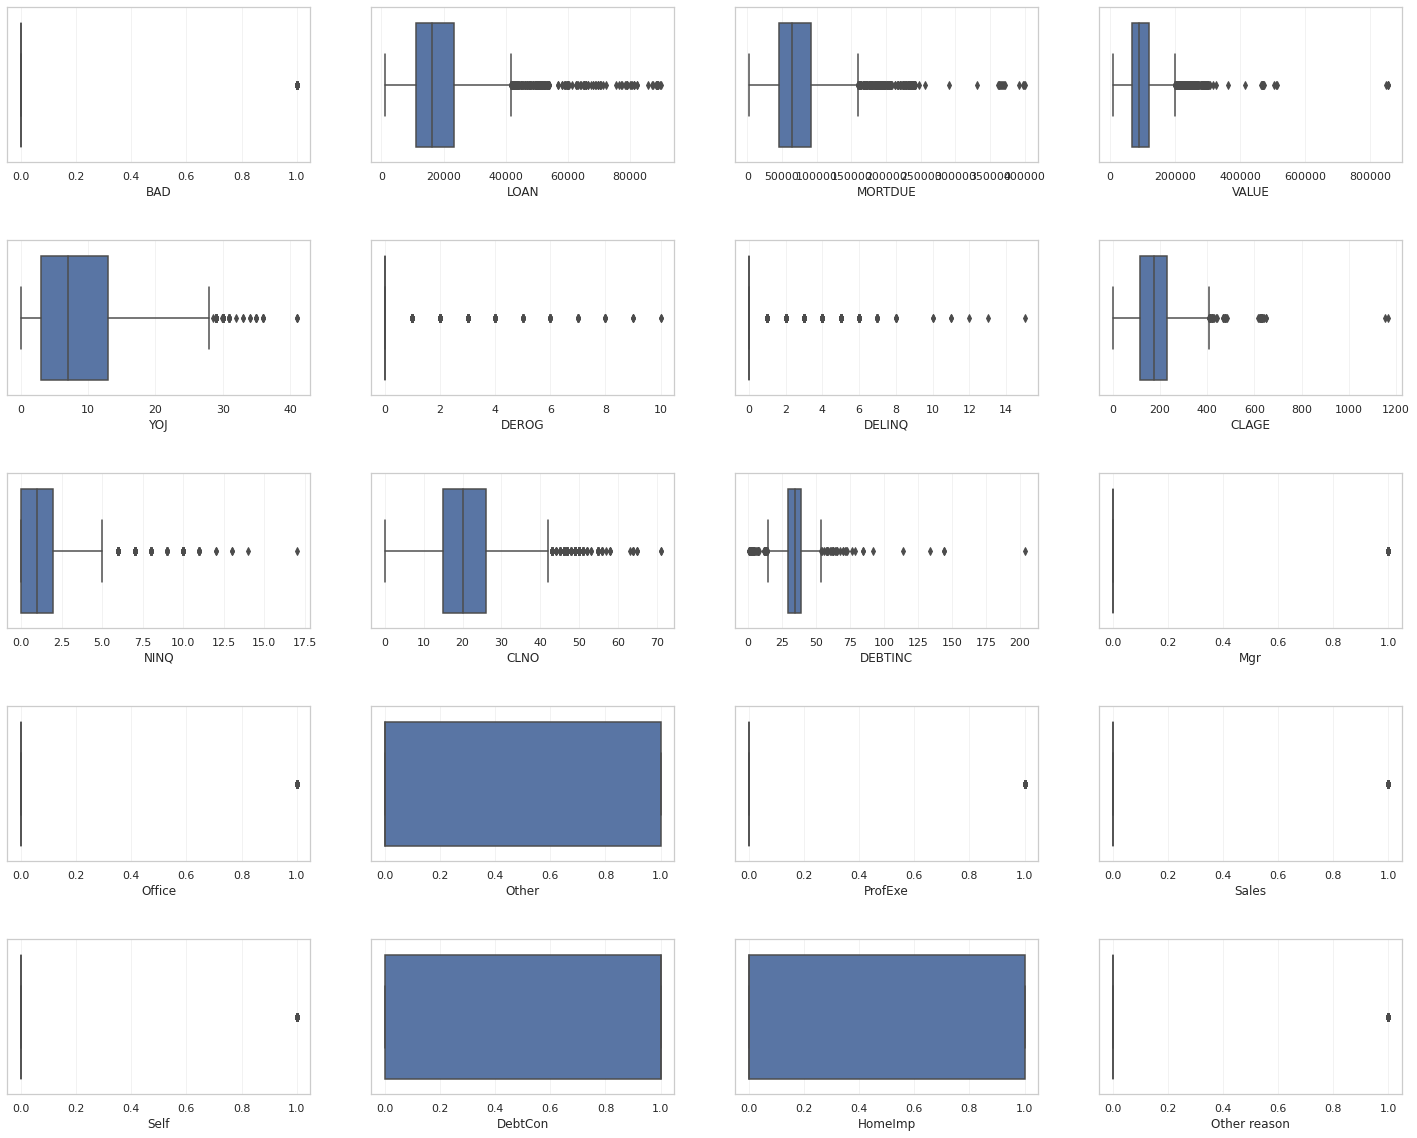

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20),)
for i,ax in zip(df.columns,axes.flat):
    sns.boxplot(data=df, x=i,ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Plotting Histograms to see the distribution of each attribute

<IPython.core.display.Javascript object>

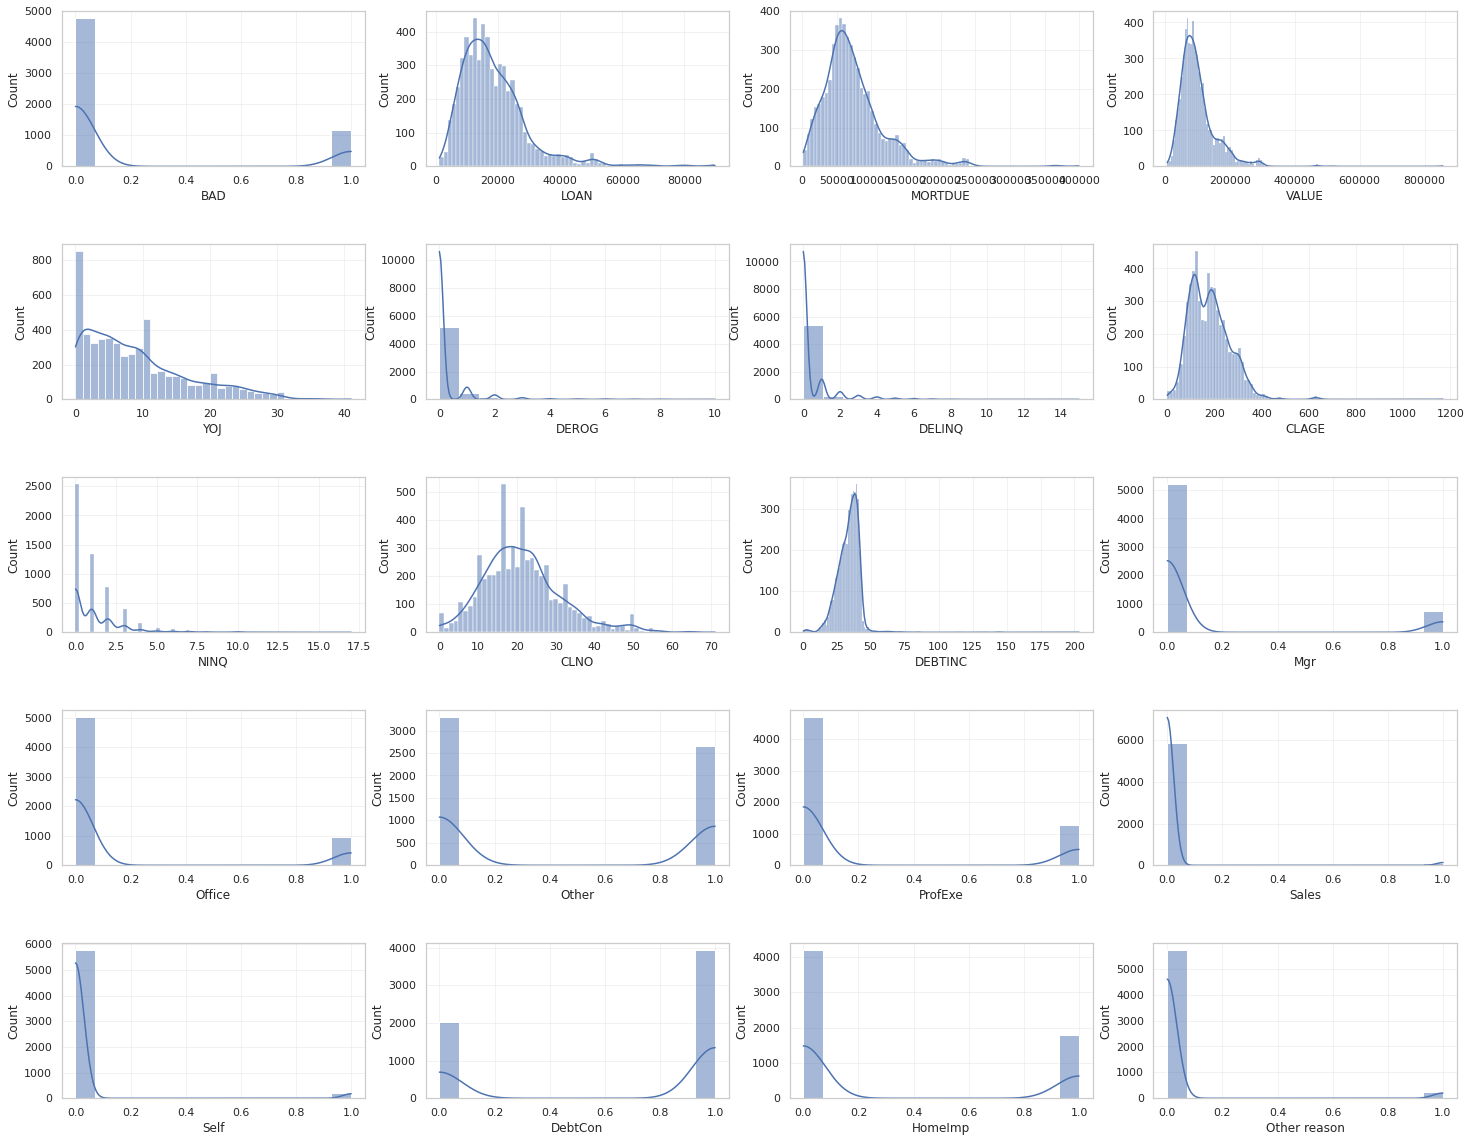

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    sns.histplot(data=df,x=i,ax=ax,kde=True)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [ ]:
# sns.pairplot(df, hue="BAD")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

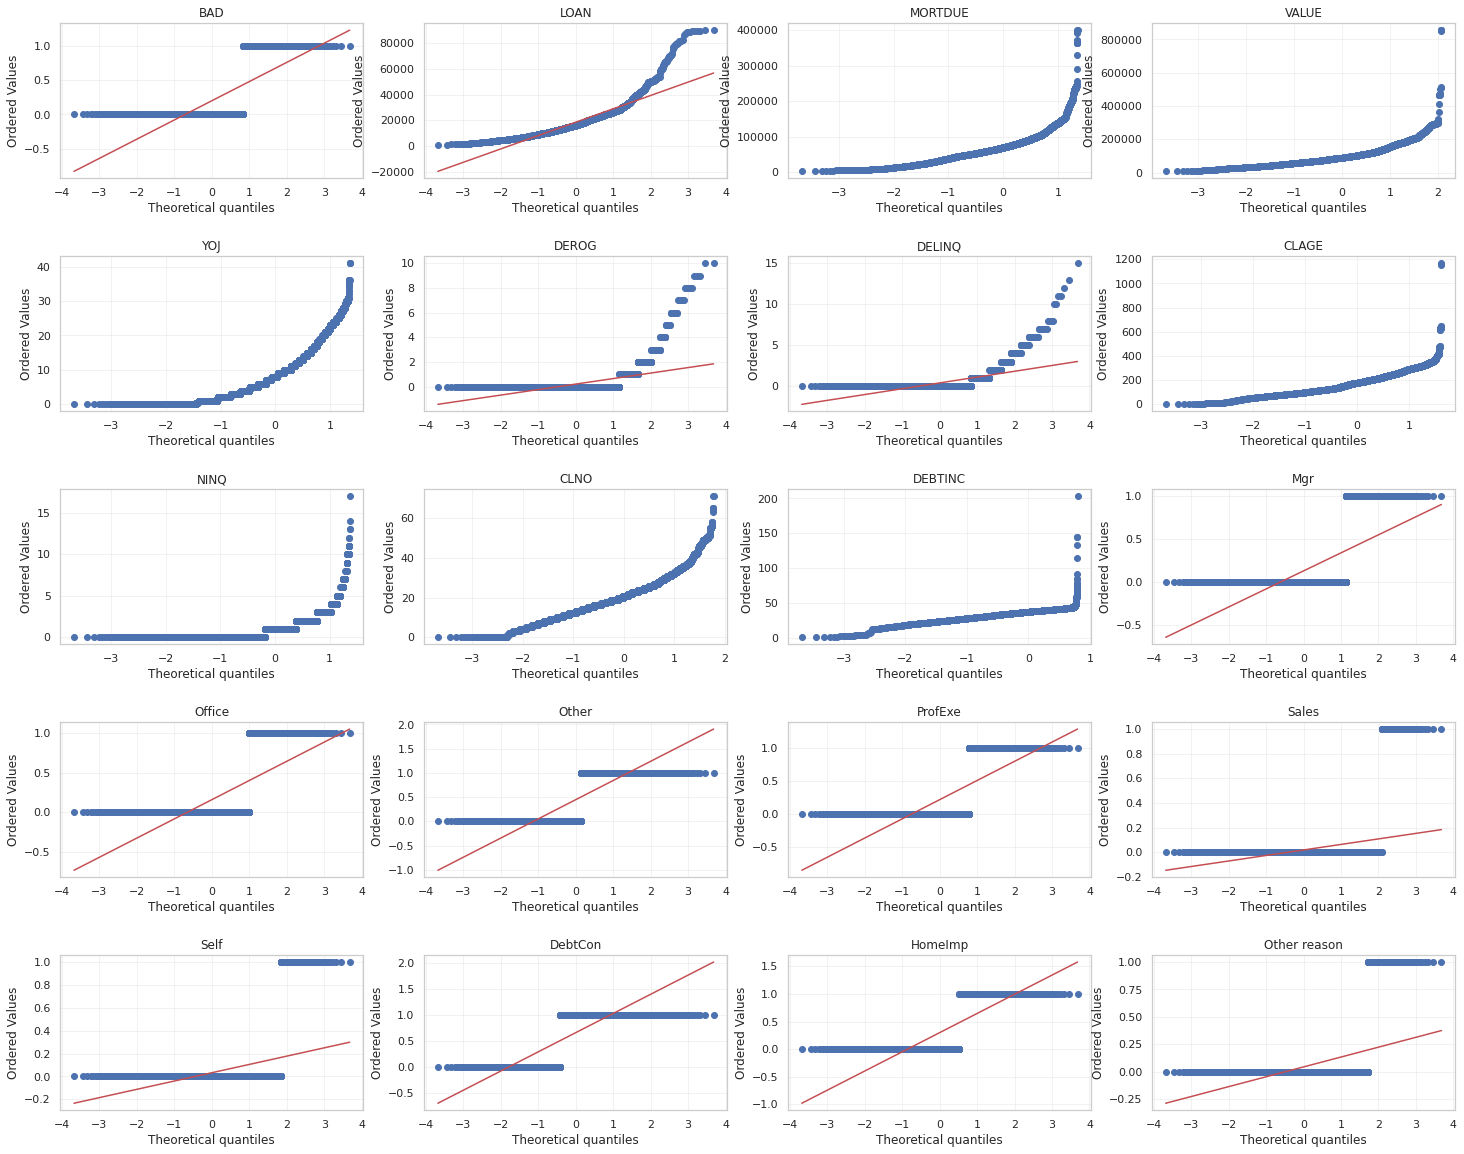

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    probplot(df[i],dist='norm',plot=ax)
    ax.set_title(i)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()




```
# This is formatted as code
```

Transforming a basic data transformation(x to the power 1/8) technique to try converting the current distribution to near normal distribution

<IPython.core.display.Javascript object>

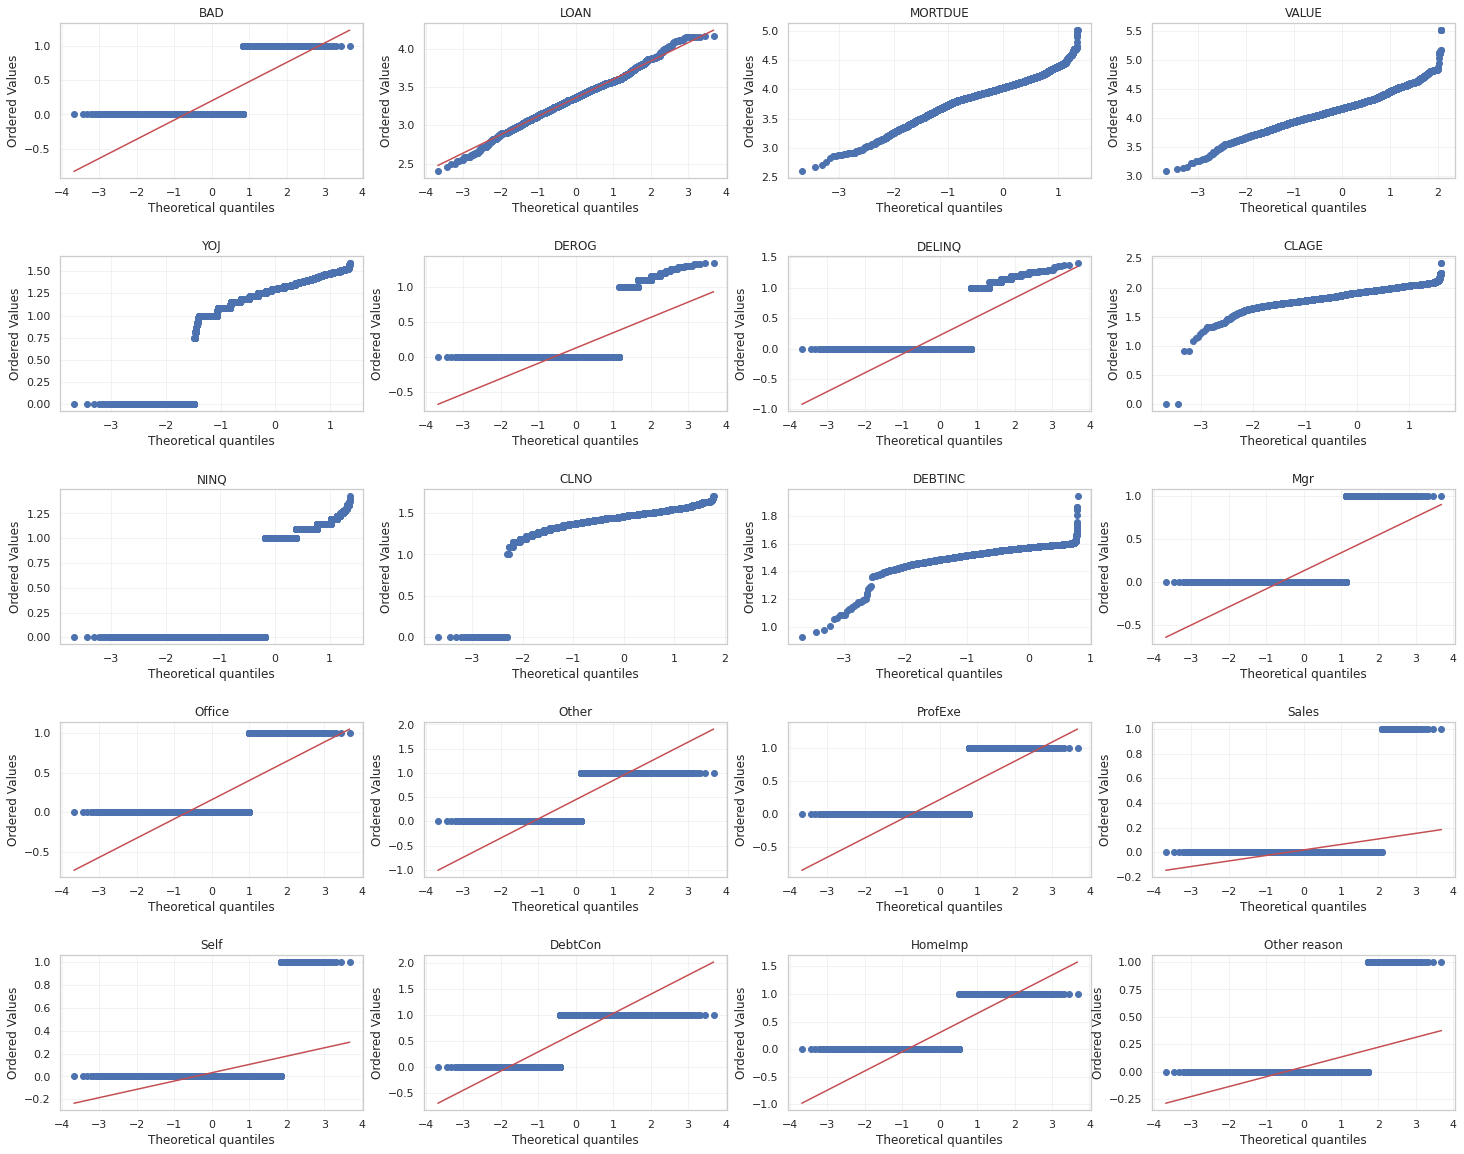

In [ ]:
from scipy.stats import yeojohnson
fig, axes = plt.subplots(5, 4, figsize=(25, 20))
for i,ax in zip(df.columns,axes.flat):
    probplot(np.power(df[i],1/8),dist='norm',plot=ax)
    ax.set_title(i)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# df = df_temp.copy()
# df_temp = df_temp.join(pd.DataFrame({"LOAN":yeojohnson(df["LOAN"])[0].reshape(-1)}))
# df_temp
# # pd.DataFrame({"LOAN":yeojohnson(df["LOAN"])[0].reshape(-1)})


Observations from the above plots:
* The **scale of each attribute is different**, we need to normalize all the features. 
* Some attributes have **skewed distribution**
* Some attributes have a lot of **outliers** (DEBTINC, LOAN, MORTDUE, VALUE)
[//]: # (Hello)
For normalizing, we can use Min-Max Scaler, but attributes like LOAN, MORTDUE, VALUE have a lot of outliers (from boxplot), so we will also try Z-Score Normalization (preferred).
<br>
For fixing the skewness, we need to transform the attributes. Our basic transformation did improve the distribution of some attributes like _LOAN_, _MORTDUE_ and _VALUE_.

**Numerosity Reduction** : Apart from the above needed steps, many tuple/observations might have many missing values in their attributes. We can consider dropping them to improve the data quality. For this we need to decide a threshold value, such that the data quality is also improved and a lot of data isn't lost.<br>
**Feature Reduction** - Dropping columns with same value for most of the observations (_DELINQ_ and _DEROG_), and after considering their Correlation and Predictive Power Score(_REASON_ and _JOB_). 

Plotting Heatmap of correlation Matrix, to understand the type of linear relation between attributes.<br>
We will again plot Heatmap of correlation after cleaning and transforming the attributes.<br>


<IPython.core.display.Javascript object>

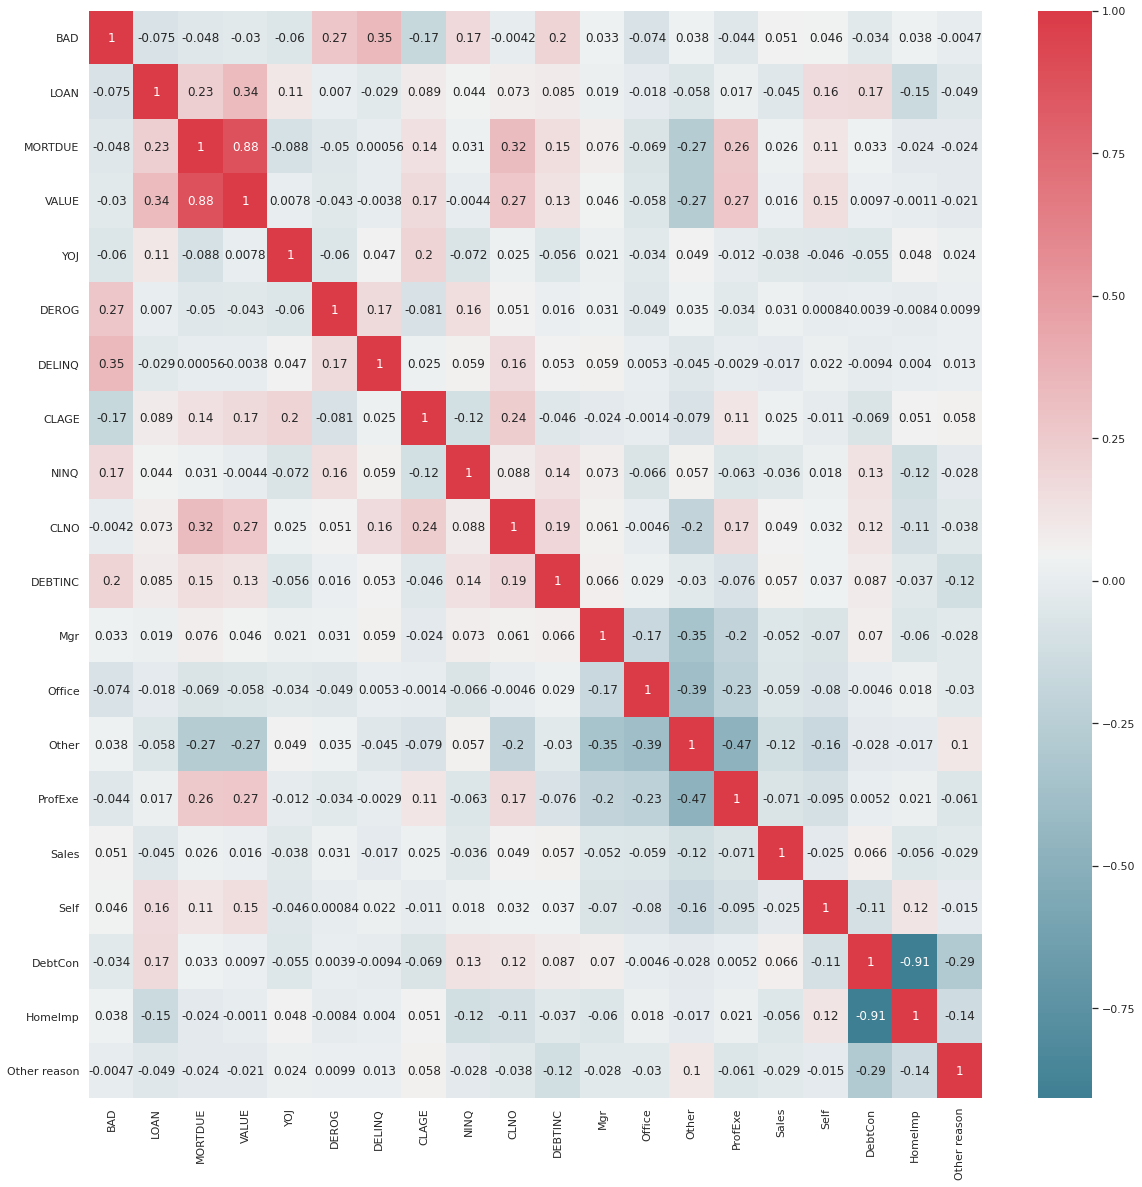

In [ ]:
plt.figure(figsize=(20,20))
heat_map = sns.heatmap(df.corr(),cmap = colormap,annot=True)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
# sns.color_palette("mako", as_cmap=True)
plt.show()

<IPython.core.display.Javascript object>

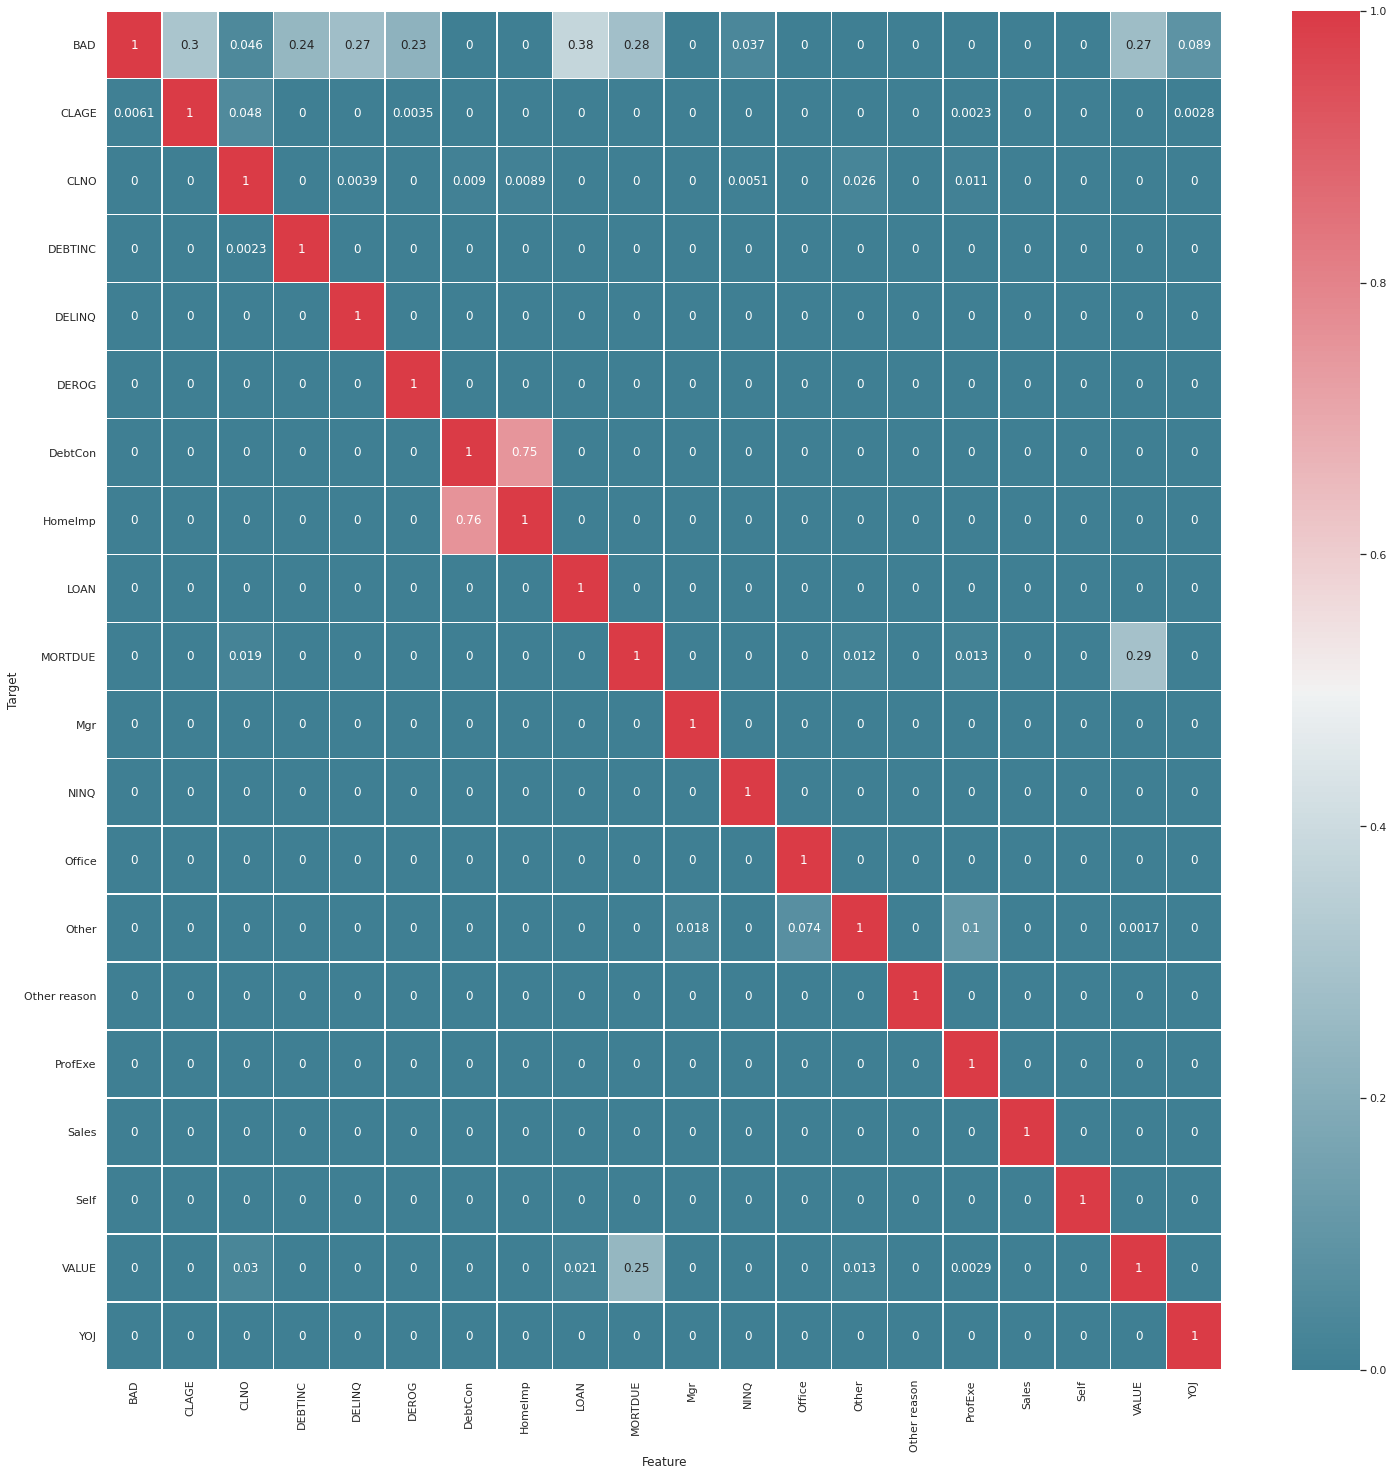

In [ ]:
plt.figure(figsize=(25,25))
import PyCustom as pc
matrix_df = PyCustom.pps(df,["BAD","JOB","REASON"])[['Feature', 'Target', 'PPS']].pivot(columns='Feature', index='Target', values='PPS')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap=colormap, linewidths=0.5,annot=True)
# plt.show()

## Data Cleaning and Transformation

In [ ]:
df["PROBINC"] = df.MORTDUE/df.DEBTINC # adding new feature, (current debt on mortgage)/(debt to income ratio)

<IPython.core.display.Javascript object>

In [ ]:
df_orig = df.copy()

<IPython.core.display.Javascript object>

Yeo-johnson transformation
* y = ((x + 1)**lmbda - 1) / lmbda,                for x >= 0, lmbda != 0
* log(x + 1),                                  for x >= 0, lmbda = 0
* ((-x + 1)**(2 - lmbda) - 1) / (2 - lmbda),  for x < 0, lmbda != 2
* log(-x + 1),                                for x < 0, lmbda = 2

In [ ]:
df_temp = df.copy()
df_temp["LOAN"] = yeojohnson(df["LOAN"])[0]          # transforming LOAN using yeo-johnson method
df_1 = df_temp.copy()
df_temp["MORTDUE"] = np.power(df["MORTDUE"],1/8)     # transforming MORTDUE by raising it to 1/8
df_temp["YOJ"] = np.log(df["YOJ"]+10) 
df_temp["VALUE"] = np.log(df["VALUE"]+10) 
df_temp["CLNO"] = np.log(df["CLNO"]+10) 
df_2 = df_temp.copy()

<IPython.core.display.Javascript object>

In [ ]:
# print("Ratio of Number of defaulters/ Number of non-defaulters : ", df[df.BAD==1].sum().sum()/df[df.BAD==0].sum().sum())

<IPython.core.display.Javascript object>

In [ ]:
df_3 = df_2.copy()

<IPython.core.display.Javascript object>

In [ ]:
df_2.drop(["HomeImp", "Other reason","Sales", "Self"],axis=1,inplace=True)

<IPython.core.display.Javascript object>

In [ ]:
df.name = 'df : original with one added feature (PROBINC)'
df_1.name = 'df_1 : transformed just LOAN feature'
df_2.name = 'df_2 : transformed LOAN, and other features too, and dropped other features (MORTDUE, YOJ), which seemed unimportant from the visualisation section'
df_3.name = 'df_3 :  contains transformed features, LOAN and others (MORTDUE,YOJ, etc.)'

<IPython.core.display.Javascript object>

* df -> original with one added feature
* df_1 -> transformed just _LOAN_ feature
* df_2 -> transformed LOAN, and other features too, and dropped other features (MORTDUE, YOJ), which seemed unimportant from the visualisation section
* df_3 -> contains transformed features, LOAN and others (MORTDUE,YOJ, etc.)

We can consider dropping Self and Other Reason as there PPS score is 0 for every other column.

We can drop MORTDUE or VALUE, as they are highly correlated and they are PPS score is also greater than 0.5
Dropping MORTDUE, because VALUE is a better predictor of BAD

In [ ]:
def preprocess(df):
  df1 = df.copy()
  # Numerosity Reduction, with a threshold of 4 null values
  df1.dropna(axis=0,thresh=4,inplace=True)
  # Filling the rest of the null values using interpolated values, mode and median
  df1.fillna(value=df1.interpolate(),inplace=True)
  df1.fillna(value=df1.mode(),inplace=True)
  df1.fillna(value=0,inplace=True)
  # Taking out the target column before using #standard scaler
  y = df["BAD"]
  df1.drop(["BAD"],axis=1,inplace=True)

  # Using Standard Scaler, as it might also take care of some outliers
  sscaler = StandardScaler()
  scaled_features = sscaler.fit_transform(df1)

  # Standard Scaler retuen a numpy array, convertig it back into a DataFrame, for ease of understanding
  scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
  return scaled_features_df,y

def preprocess_min_max(df):
  df1 = df.copy()
  # Numerosity Reduction, with a threshold of 4 null values
  df1.dropna(axis=0,thresh=4,inplace=True)
  # Filling the rest of the null values using interpolated values, mode and median
  df1.fillna(value=df1.interpolate(),inplace=True)
  df1.fillna(value=df1.mode(),inplace=True)
  df1.fillna(value=0,inplace=True)
  # Taking out the target column before using #standard scaler
  y = df["BAD"]
  df1.drop(["BAD"],axis=1,inplace=True)

  # Using Standard Scaler, as it might also take care of some outliers
  sscaler = MinMaxScaler()
  scaled_features = sscaler.fit_transform(df1)

  # Standard Scaler retuen a numpy array, convertig it back into a DataFrame, for ease of understanding
  scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
  return scaled_features_df,y

<IPython.core.display.Javascript object>

Chi-Square Test for 

<IPython.core.display.Javascript object>

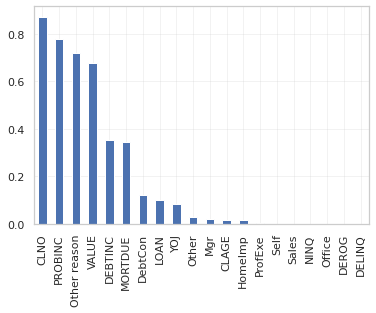

In [ ]:
x1,y1 = preprocess_min_max(df)
chi_scores = chi2(x1,y1)  
p_values = pd.Series(chi_scores[1],index = x1.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_final

df3=remove_outlier_IQR(df)
print("Number of outliers removed : " , df.shape[0]-df3.shape[0])

<IPython.core.display.Javascript object>

Number of outliers removed :  4656


<IPython.core.display.Javascript object>

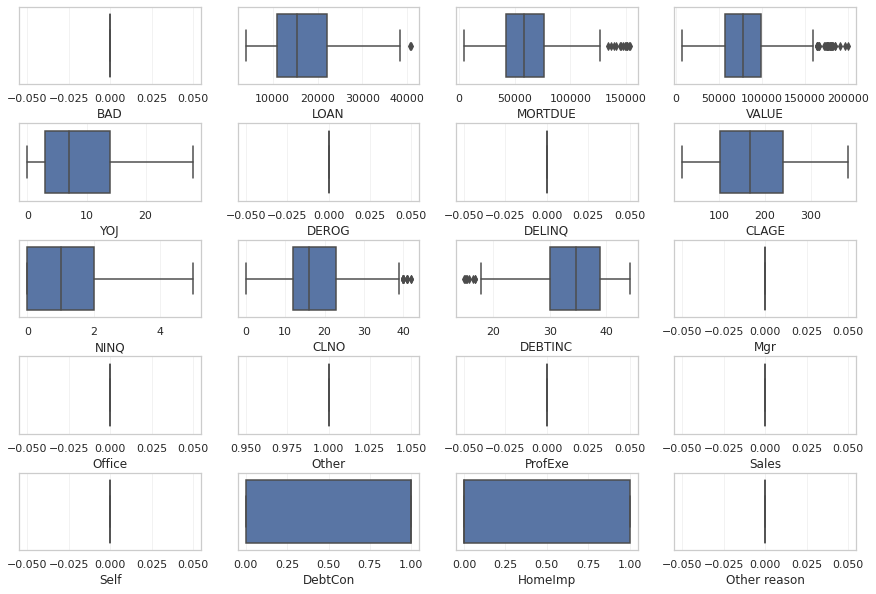

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(15, 10),)
for i,ax in zip(df3.columns,axes.flat):
    sns.boxplot(x = df3[i],ax=ax)     # we can also use violin plot 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

NUmber of outliers removed are too large, this decreases the data quality.

PCA can be performed for both the numeric continous variables and the categorical and numeric discrete variables but it is most effective and designed for numeric continous variables.

In [ ]:
pca = PCA(n_components=6)
pca_df,pca_y = preprocess(df_2)
principalComponents = pca.fit_transform(pca_df)
principalDf = pd.DataFrame(data = principalComponents)
print(pca.explained_variance_)

<IPython.core.display.Javascript object>

[2.69715805 1.53162749 1.37144006 1.28648315 1.25098396 1.13470195]


The model result was not that good after using PCA with 6 Principal Components

Building the Model

In [ ]:

# kfold_model = LogisticRegression()
# kf = StratifiedKFold(n_splits=5 ,shuffle=True, random_state=1)
# kf_scores1 = []
# kf_scores2 = []
# xmat1 = X1_rfe.values
# xmat2 = X2_rfe.values
# ymat1 = y1.values
# ymat2 = y2.values
# for train_index, test_index in kf.split(xmat1, ymat1):
#     X_train, y_train = xmat1[train_index] , ymat1[train_index]
#     kfold_model.fit(X_train,y_train)
#     y_pre = kfold_model.predict(xmat1[test_index])
#     kf_scores1.append(accuracy_score(ymat1[test_index], y_pre))
# print(mean(kf_scores1))

# for train_index, test_index in kf.split(xmat2, ymat2):
#     X_train, y_train = xmat2[train_index] , ymat2[train_index]
#     kfold_model.fit(X_train,y_train)
#     y_pre = kfold_model.predict(xmat2[test_index])
#     kf_scores2.append(accuracy_score(ymat2[test_index], y_pre))

# print(mean(kf_scores2))

In [ ]:
# defining plot_roc function function

def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for loan defaulter prediction")
    plt.legend(loc="lower right")
    plt.show()

<IPython.core.display.Javascript object>

In [ ]:
def plotconfusionmatrix(y, y_pred):
    cf_matrix = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

<IPython.core.display.Javascript object>

In [ ]:
def model_analysis(model,x_test, y_true,y_pred):
    plot_roc(y_true, y_pred)
    plotconfusionmatrix(y_true, y_pred)
    print(classification_report(y_test, y_pred))

<IPython.core.display.Javascript object>

In [ ]:
def build_and_analysis(df,models):
  scaled_features_df,y = preprocess(df)
  x_train, x_test, y_train, y_test = train_test_split(scaled_features_df,y)
  for i in models:
    model = i()
    model.fit(x_train,y_train)
    print(str(type(model)).split(".")[-1][:-2])
    print("Accuracy on Training Dataset : ",model.score(x_train,y_train))
    print("Accuracy on CV Dataset : ",model.score(x_test,y_test))
    model_analysis(model,x_test,y_test,model.predict(x_test))
    print("\n \n \n \n")

<IPython.core.display.Javascript object>

In [ ]:
# Dividing the dataset into training and cross-validation
# y = df["BAD"]
# df.drop(["BAD"],axis=1,inplace=True)
scaled_features_df,y = preprocess(df_2)
x_train, x_test, y_train, y_test = train_test_split(scaled_features_df,y)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

LogisticRegression
Accuracy on Training Dataset :  0.8425055928411633
Accuracy on CV Dataset :  0.8496644295302014


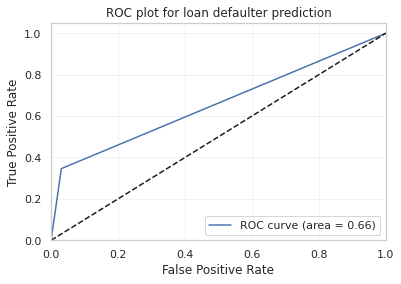

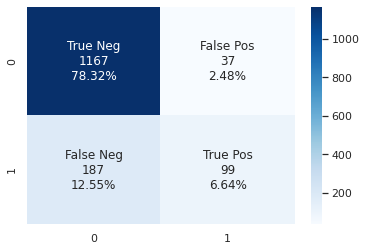

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1177
           1       0.24      0.11      0.15       313

    accuracy                           0.74      1490
   macro avg       0.52      0.51      0.50      1490
weighted avg       0.68      0.74      0.70      1490


 
 
 

DecisionTreeClassifier
Accuracy on Training Dataset :  1.0
Accuracy on CV Dataset :  0.8651006711409396


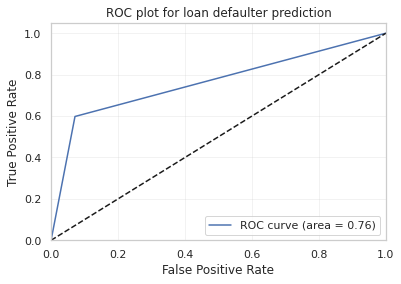

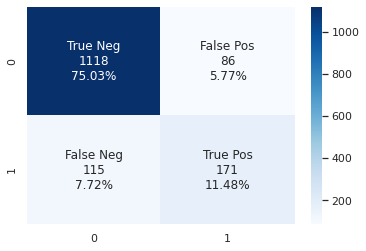

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1177
           1       0.20      0.17      0.18       313

    accuracy                           0.69      1490
   macro avg       0.50      0.50      0.49      1490
weighted avg       0.67      0.69      0.68      1490


 
 
 

RandomForestClassifier
Accuracy on Training Dataset :  1.0
Accuracy on CV Dataset :  0.9194630872483222


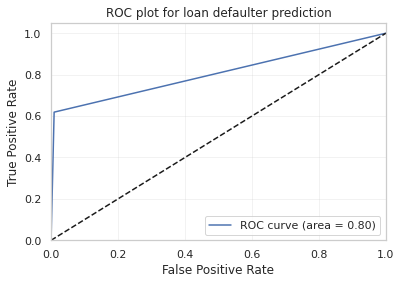

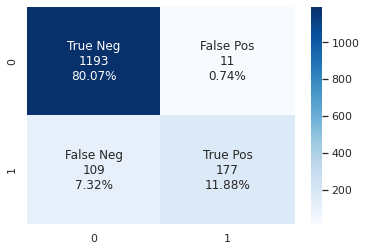

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1177
           1       0.18      0.11      0.14       313

    accuracy                           0.71      1490
   macro avg       0.48      0.49      0.48      1490
weighted avg       0.66      0.71      0.68      1490


 
 
 

SVC
Accuracy on Training Dataset :  0.8993288590604027
Accuracy on CV Dataset :  0.8899328859060402


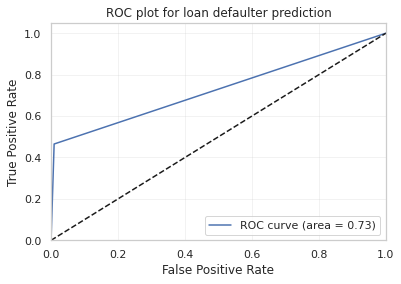

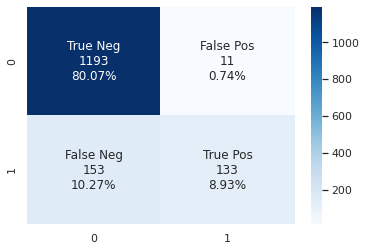

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1177
           1       0.19      0.09      0.12       313

    accuracy                           0.73      1490
   macro avg       0.49      0.50      0.48      1490
weighted avg       0.66      0.73      0.69      1490


 
 
 

ExtraTreesClassifier
Accuracy on Training Dataset :  1.0
Accuracy on CV Dataset :  0.9302013422818792


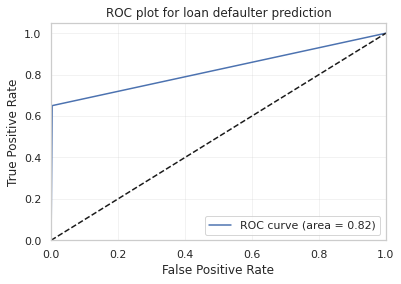

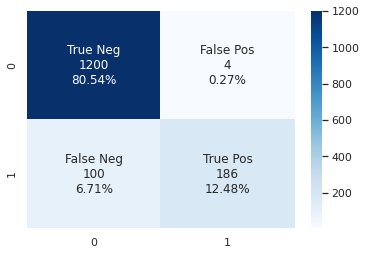

              precision    recall  f1-score   support

           0       0.79      0.87      0.82      1177
           1       0.18      0.11      0.14       313

    accuracy                           0.71      1490
   macro avg       0.48      0.49      0.48      1490
weighted avg       0.66      0.71      0.68      1490


 
 
 

GradientBoostingClassifier
Accuracy on Training Dataset :  0.905145413870246
Accuracy on CV Dataset :  0.8899328859060402


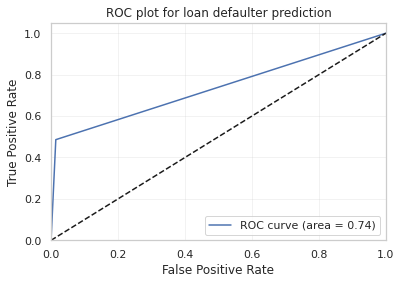

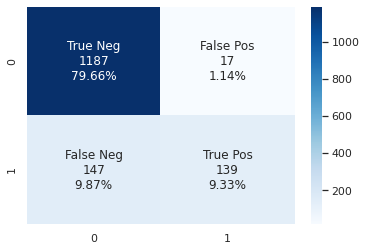

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1177
           1       0.24      0.12      0.16       313

    accuracy                           0.74      1490
   macro avg       0.52      0.51      0.50      1490
weighted avg       0.68      0.74      0.70      1490


 
 
 

AdaBoostClassifier
Accuracy on Training Dataset :  0.8588366890380313
Accuracy on CV Dataset :  0.8570469798657718


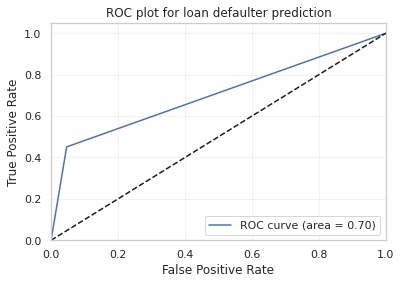

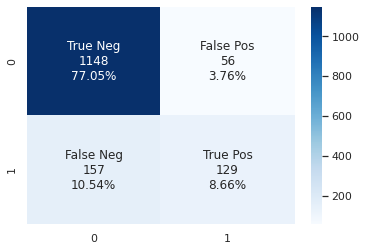

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1177
           1       0.22      0.13      0.16       313

    accuracy                           0.72      1490
   macro avg       0.50      0.50      0.50      1490
weighted avg       0.67      0.72      0.69      1490


 
 
 



In [ ]:
build_and_analysis(df_2,[LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier])

**Our objective is to minimize company loss, predicting the risk of client default, a good recall rate is desirable because we want to identify the maximum amount of clients that are indeed prone to stop paying their debts, thus, we are pursuing a small number of False Negatives.**

Testing the models on cross-validation dataset, and comparing with training dataset

Analysis of Transformations:

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

def analysis(df,y):
  x_train,x_test, y_train,y_test = train_test_split(df,y)
  classifiers = [
      KNeighborsClassifier(3),
      SVC(probability=True),
      DecisionTreeClassifier(),
      RandomForestClassifier(),
      AdaBoostClassifier(),
      GradientBoostingClassifier(),
      GaussianNB(),
      LinearDiscriminantAnalysis(),
      QuadraticDiscriminantAnalysis(),
      LogisticRegression()
  ]

  log_cols = ["Classifier", "Accuracy"]
  log = pd.DataFrame(columns=log_cols)

  acc_dict = {}

  for clf in classifiers:
      name = clf.__class__.__name__
      clf.fit(x_train, y_train)
      train_predictions = clf.predict(x_test)
      acc = accuracy_score(y_test, train_predictions)

      if name in acc_dict:
          acc_dict[name] += acc
      else:
          acc_dict[name] = acc

  for clf in acc_dict:
      acc_dict[clf] = acc_dict[clf]
      log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns = log_cols)
      log = log.append(log_entry)

  plt.xlabel('Accuracy')
  plt.title('Classifier Accuracy')

  sns.set_color_codes("muted")
  barplots = sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = "b")
  for p in barplots.patches:
    barplots.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
  plt.show()
  print(acc_dict)

<IPython.core.display.Javascript object>

Comparing various transformaton, to observe their effect on performance

<IPython.core.display.Javascript object>

For dataset  df : original with one added feature (PROBINC)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


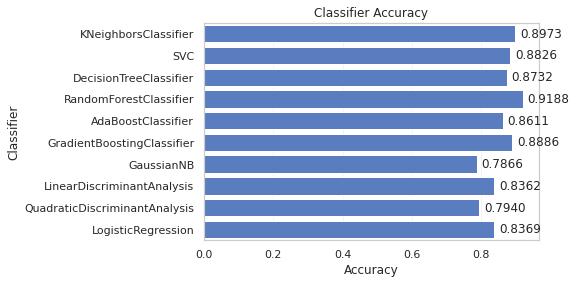

{'KNeighborsClassifier': 0.8973154362416107, 'SVC': 0.8825503355704698, 'DecisionTreeClassifier': 0.8731543624161073, 'RandomForestClassifier': 0.9187919463087248, 'AdaBoostClassifier': 0.8610738255033556, 'GradientBoostingClassifier': 0.8885906040268456, 'GaussianNB': 0.7865771812080536, 'LinearDiscriminantAnalysis': 0.836241610738255, 'QuadraticDiscriminantAnalysis': 0.7939597315436242, 'LogisticRegression': 0.8369127516778524}


For dataset  df_1 : transformed just LOAN feature


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


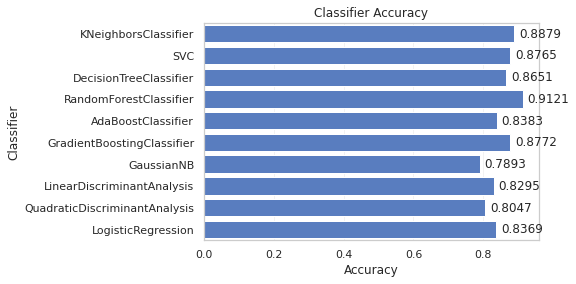

{'KNeighborsClassifier': 0.8879194630872483, 'SVC': 0.876510067114094, 'DecisionTreeClassifier': 0.8651006711409396, 'RandomForestClassifier': 0.9120805369127517, 'AdaBoostClassifier': 0.838255033557047, 'GradientBoostingClassifier': 0.8771812080536913, 'GaussianNB': 0.789261744966443, 'LinearDiscriminantAnalysis': 0.8295302013422818, 'QuadraticDiscriminantAnalysis': 0.8046979865771812, 'LogisticRegression': 0.8369127516778524}


For dataset  df_2 : transformed LOAN, and other features too, and dropped other features (MORTDUE, YOJ), which seemed unimportant from the visualisation section


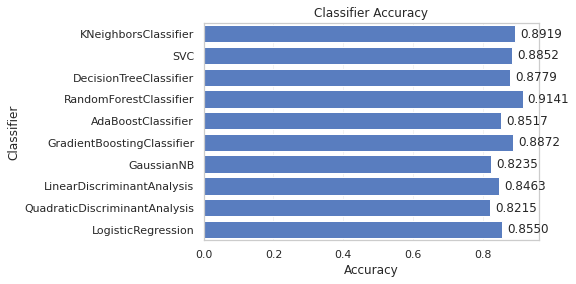

{'KNeighborsClassifier': 0.8919463087248322, 'SVC': 0.885234899328859, 'DecisionTreeClassifier': 0.8778523489932886, 'RandomForestClassifier': 0.9140939597315436, 'AdaBoostClassifier': 0.8516778523489933, 'GradientBoostingClassifier': 0.887248322147651, 'GaussianNB': 0.823489932885906, 'LinearDiscriminantAnalysis': 0.8463087248322148, 'QuadraticDiscriminantAnalysis': 0.8214765100671141, 'LogisticRegression': 0.8550335570469799}


For dataset  df_3 :  contains transformed features, LOAN and others (MORTDUE,YOJ, etc.)


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


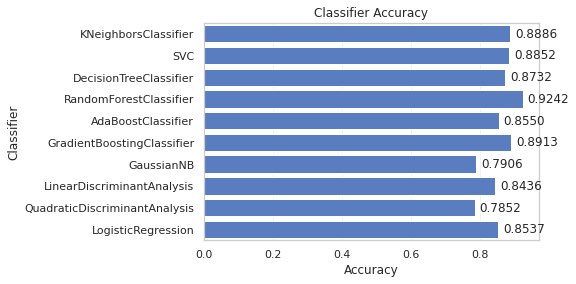

{'KNeighborsClassifier': 0.8885906040268456, 'SVC': 0.885234899328859, 'DecisionTreeClassifier': 0.8731543624161073, 'RandomForestClassifier': 0.9241610738255034, 'AdaBoostClassifier': 0.8550335570469799, 'GradientBoostingClassifier': 0.8912751677852349, 'GaussianNB': 0.7906040268456376, 'LinearDiscriminantAnalysis': 0.8436241610738255, 'QuadraticDiscriminantAnalysis': 0.785234899328859, 'LogisticRegression': 0.8536912751677852}




In [ ]:
for i in [df, df_1,df_2,df_3]:
  x1,y1 = preprocess(i)
  print("For dataset ", i.name)
  analysis(x1,y1)
  print()
  print()

Chi-square future selection on Logistic Regression

In [ ]:
x1,y1 = preprocess_min_max(df)
df_new = pd.DataFrame(SelectKBest(chi2, k=8).fit_transform(x1,y1))

<IPython.core.display.Javascript object>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_new,y1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy on Training Dataset :  0.8295302013422818
Accuracy on CV Dataset :  0.8228187919463087


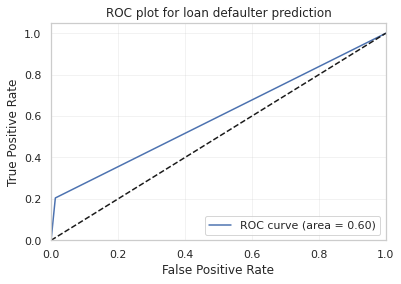

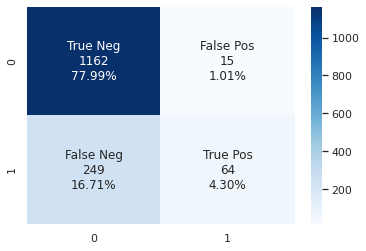

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1177
           1       0.81      0.20      0.33       313

    accuracy                           0.82      1490
   macro avg       0.82      0.60      0.61      1490
weighted avg       0.82      0.82      0.78      1490



In [ ]:
lr = LogisticRegression()       # tuning hyperparameters : penalty="l1",solver="liblinear",max_iter=100,C=0.004
lr.fit(x_train,y_train)
print("Accuracy on Training Dataset : ",lr.score(x_train,y_train))
print("Accuracy on CV Dataset : ",lr.score(x_test,y_test))
model_analysis(lr,x_test,y_test,lr.predict(x_test))